In [1]:
!pip install tensorflow


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0


A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 1060s 6us/step


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 output classes
])


C:\Users\vemur\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 35ms/step - accuracy: 0.3429 - loss: 1.7724 - val_accuracy: 0.5260 - val_loss: 1.3094
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.5646 - loss: 1.2261 - val_accuracy: 0.5936 - val_loss: 1.1475
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.6371 - loss: 1.0353 - val_accuracy: 0.6583 - val_loss: 0.9766
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 35ms/step - accuracy: 0.6738 - loss: 0.9292 - val_accuracy: 0.6621 - val_loss: 0.9687
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 29ms/step - accuracy: 0.7014 - loss: 0.8543 - val_accuracy: 0.6739 - val_loss: 0.9414
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7247 - loss: 0.7846 - val_accuracy: 0.7032 - val_loss: 0.8488
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.7460 - loss: 0.7215 - val_accuracy: 0.7103 - val_loss: 0.8438
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.7586 -

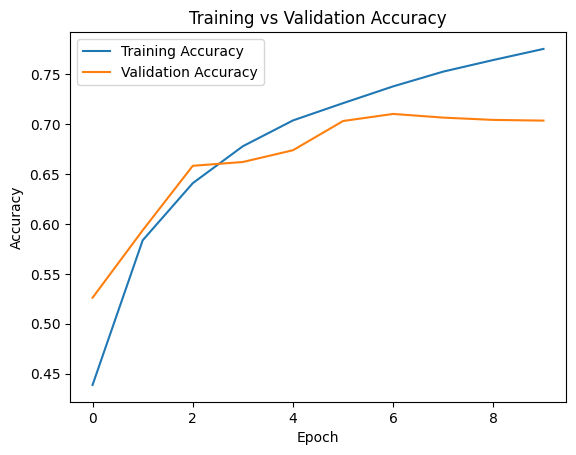

In [5]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


In [6]:
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Predict first 5 images
probability_model = tf.keras.Sequential([model, layers.Softmax()])
predictions = probability_model.predict(x_test[:5])

# Show predictions
for i in range(5):
    print(f"Prediction: {np.argmax(predictions[i])}, Actual: {y_test[i][0]}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7065 - loss: 0.8823
Test Accuracy: 0.70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
Prediction: 3, Actual: 3
Prediction: 8, Actual: 8
Prediction: 8, Actual: 8
Prediction: 0, Actual: 0
Prediction: 4, Actual: 6


For predictions

In [22]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess new image
img_path = r'C:\Users\vemur\OneDrive\Desktop\truck.jpeg'
img = image.load_img(img_path, target_size=(32, 32))  # Resize to 32x32
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

In [23]:
# Use your trained model
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
prediction = probability_model.predict(img_array)

predicted_class = np.argmax(prediction)
print("Predicted Class Index:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Predicted Class Index: 9


In [24]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print("Predicted Class Name:", class_names[predicted_class])

Predicted Class Name: truck
